In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from importlib import reload
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras import backend as K
import tensorflow as tf
import glob
from shutil import copyfile
from keras.models import load_model
from keras import optimizers

In [2]:
img_shape = (224, 224, 3)
model = load_model('../../weights.hdf5')
model

In [3]:
classes = [
    'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
    'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
    'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
    'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
    'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2',
    'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4',
    'Class11.5', 'Class11.6'
] #37 vectors of Galaxy Zoo divided into 11 classes based on the 11 different questions and their responses


def append_ext(fn):
    '''
    This function is used to take the GalaxyID from the CSV and append .jpg to it in order to denote the image names. 
    '''
    return fn + ".jpg"

traindf = pd.read_csv('../Data/GalaxyZoo2/GZ_2_Processed_classes.csv')
traindf["id"] = traindf['GalaxyID'].astype(str).apply(append_ext)

datagenerator = ImageDataGenerator(
    fill_mode='nearest',
    cval=0,
    rescale=1/255,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.02)

train_generator = datagenerator.flow_from_dataframe(
    dataframe=traindf,
    directory="../Data/GalaxyZoo2/images_gz2/images",
    x_col="id",
    y_col=classes,
    subset="training",
    batch_size=16,
    seed=123,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))

validation_generator = datagenerator.flow_from_dataframe(
    dataframe=traindf,
    directory="../Data/GalaxyZoo2/images_gz2/images",
    x_col="id",
    y_col=classes,
    subset="validation",
    batch_size=16,
    seed=123,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

D:\anaconda\envs\majorproject\lib\site-packages\keras\preprocessing\image.py:1267: UserWarning: Found 108 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


Found 199651 validated image filenames.
Found 4074 validated image filenames.


D:\anaconda\envs\majorproject\lib\site-packages\keras\preprocessing\image.py:1267: UserWarning: Found 108 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [4]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [5]:
for layer in model.layers:
    layer.trainable = True

optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=5e-4)

model.compile(optimizer, loss='mse', metrics=["accuracy"])

In [6]:
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping


class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))


early_stopping = EarlyStopping(
    monitor='val_loss', patience=4, verbose=1, mode='auto')

history = LossHistory()

from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    filepath='../Data/GalaxyZoo2/model/IL_Weights.hdf5', verbose=2, save_best_only=True)

In [7]:
hist = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=30,
    callbacks=[history, checkpointer, early_stopping])

Epoch 1/30
12478/12478 [==============================] - ETA: 0s - loss: 0.0526 - accuracy: 0.4540
Epoch 1: val_loss improved from inf to 0.03843, saving model to ../Data/GalaxyZoo2/model\IL_Weights.hdf5
12478/12478 [==============================] - 7002s 560ms/step - loss: 0.0526 - accuracy: 0.4540 - val_loss: 0.0384 - val_accuracy: 0.4235
Epoch 2/30
12478/12478 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.4422
Epoch 2: val_loss improved from 0.03843 to 0.03670, saving model to ../Data/GalaxyZoo2/model\IL_Weights.hdf5
12478/12478 [==============================] - 5867s 470ms/step - loss: 0.0488 - accuracy: 0.4422 - val_loss: 0.0367 - val_accuracy: 0.3206
Epoch 3/30
12478/12478 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.4382
Epoch 3: val_loss did not improve from 0.03670
12478/12478 [==============================] - 6114s 490ms/step - loss: 0.0478 - accuracy: 0.4382 - val_loss: 0.0369 - val_accuracy: 0.4045
Epoch 4/30
12478/12

Epoch 26/30
12478/12478 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.4174
Epoch 26: val_loss improved from 0.03338 to 0.03338, saving model to ../Data/GalaxyZoo2/model\IL_Weights.hdf5
12478/12478 [==============================] - 4379s 351ms/step - loss: 0.0451 - accuracy: 0.4174 - val_loss: 0.0334 - val_accuracy: 0.2918
Epoch 27/30
12478/12478 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.4172
Epoch 27: val_loss improved from 0.03338 to 0.03321, saving model to ../Data/GalaxyZoo2/model\IL_Weights.hdf5
12478/12478 [==============================] - 3482s 279ms/step - loss: 0.0451 - accuracy: 0.4172 - val_loss: 0.0332 - val_accuracy: 0.3152
Epoch 28/30
12478/12478 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.4182
Epoch 28: val_loss did not improve from 0.03321
12478/12478 [==============================] - 3420s 274ms/step - loss: 0.0450 - accuracy: 0.4182 - val_loss: 0.0333 - val_accuracy: 0.3164
Epoch 29/

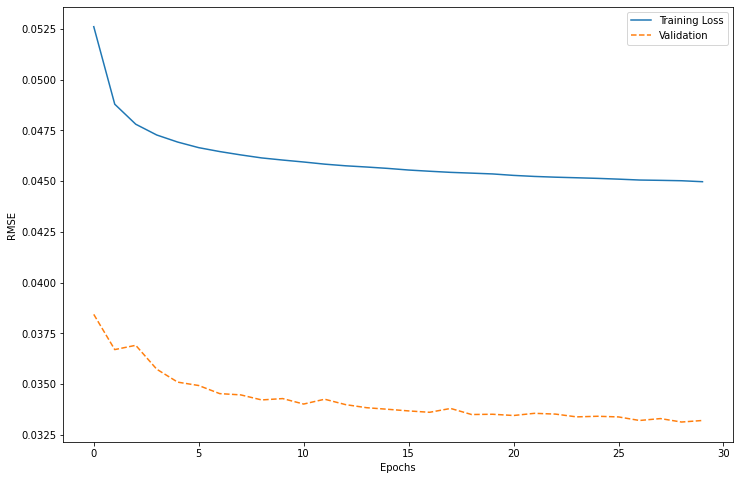

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(hist.epoch, hist.history['loss'], label='Training Loss')
plt.plot(
    hist.epoch, hist.history['val_loss'], label='Validation', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()